## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [2]:
df = pd.read_csv('books.csv', on_bad_lines = 'skip')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


## Data Exploration

In [3]:
# Checking for null values
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [4]:
# Checking info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [5]:
# Checking different statistical measures
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


## Visualizing the data

**Top 10: Average rating vs book title**

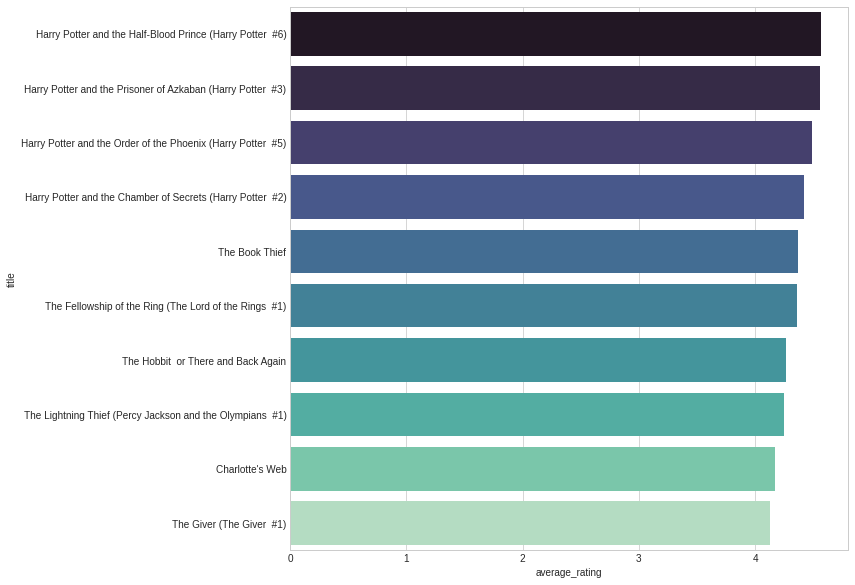

In [6]:
top_ten = df[df['ratings_count'] > 1000000]
data = top_ten.sort_values(by = 'average_rating', ascending=False)[:10]
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,10))
sns.barplot(x='average_rating', y='title', data=data, palette='mako')
plt.show()

**Top 10: Number of books vs author names**

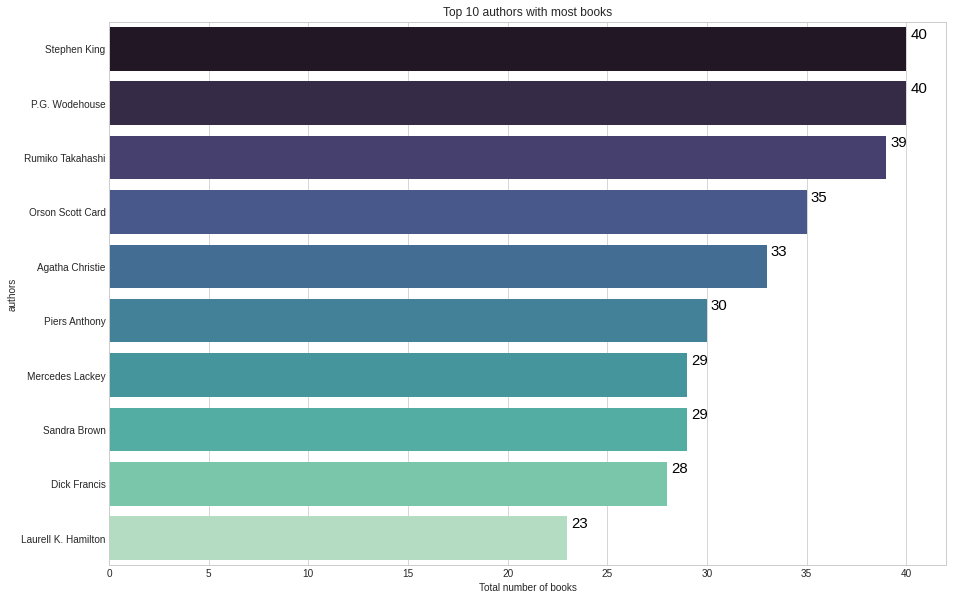

In [7]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(x=most_books['title'], y=most_books.index, palette='mako')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())), fontsize=15,color='black')
plt.show()

In [8]:
book_aut = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
book_aut

,title
authors,
Stephen King,40
P.G. Wodehouse,40
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33
Piers Anthony,30
Mercedes Lackey,29
Sandra Brown,29
Dick Francis,28


#### Top 10 author with most books

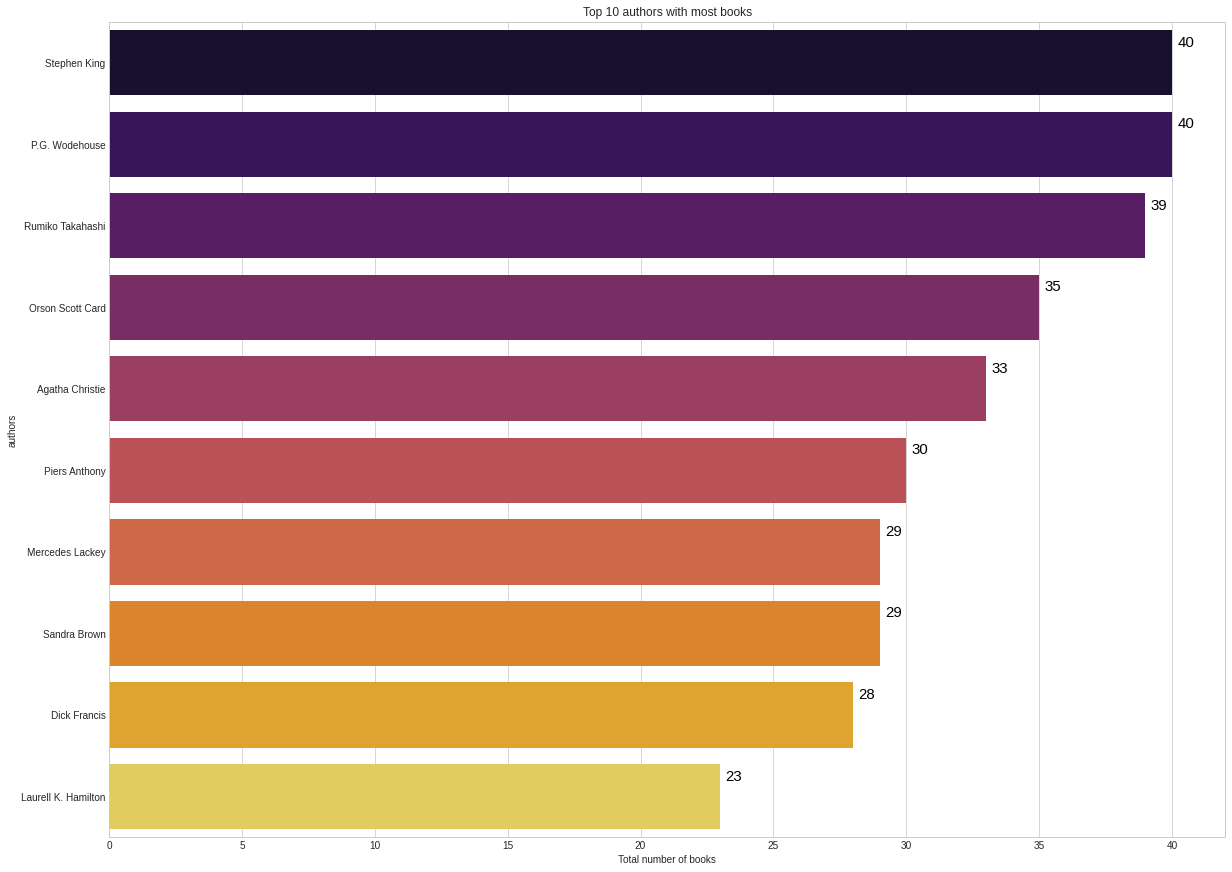

In [9]:
plt.figure(figsize=(20, 15))
ax = sns.barplot(x=book_aut['title'], y=book_aut.index, palette='inferno')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())), fontsize=15,color='black')
plt.show()

#### Top 10 rated books

In [15]:
most_rated = df.sort_values(by='ratings_count',ascending=False).reset_index().set_index('title')[:10]

most_rated.head()

,index,bookID,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
title,,,,,,,,,,,,
Twilight (Twilight #1),10336,41865,Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company
The Hobbit or There and Back Again,1697,5907,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
The Catcher in the Rye,1462,5107,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,1/30/2001,Back Bay Books
Angels & Demons (Robert Langdon #1),307,960,Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,4/1/2006,Pocket Books
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),3,5,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.


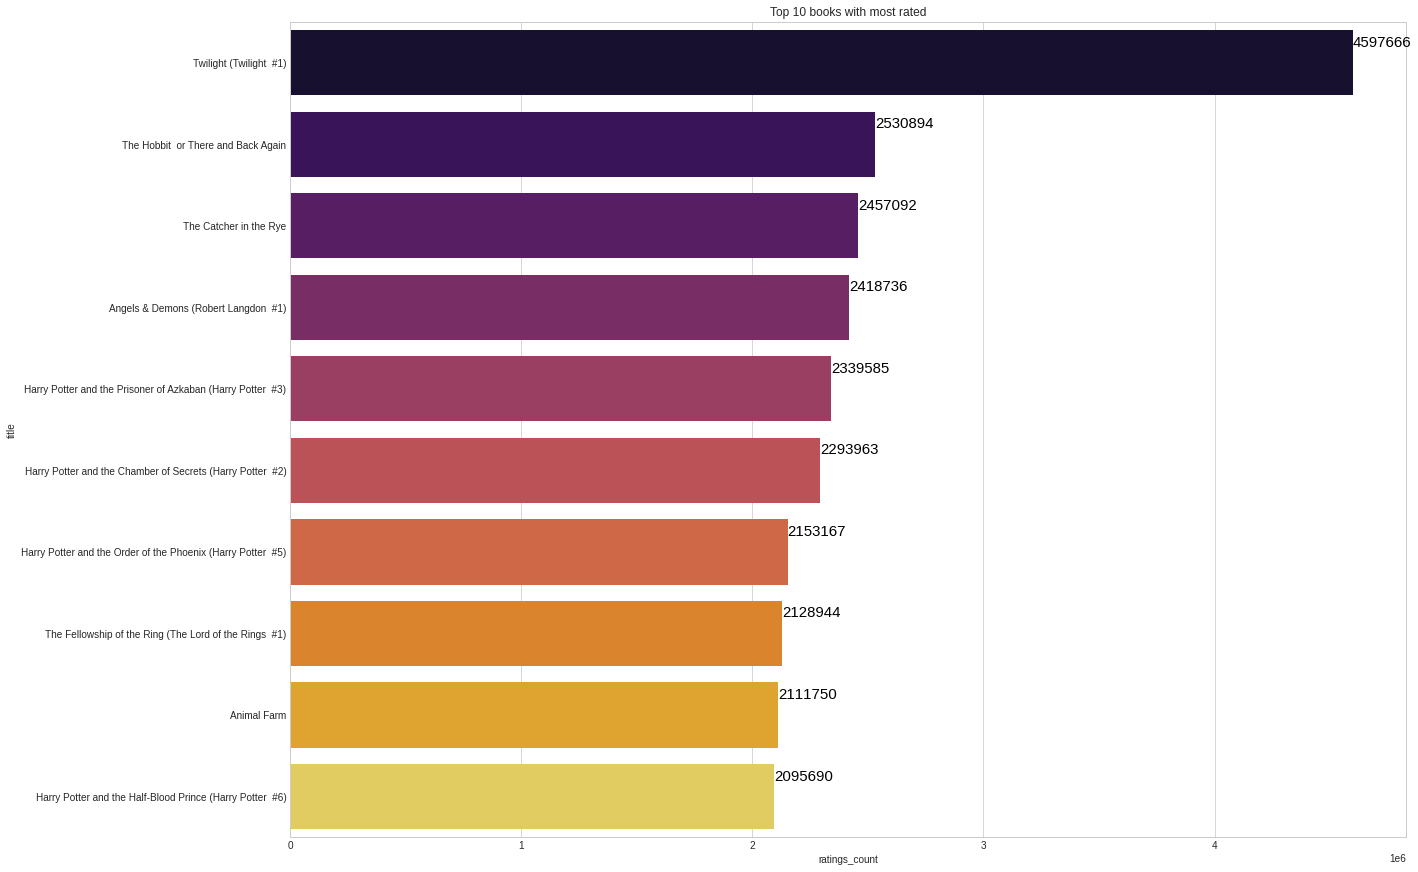

In [16]:
plt.figure(figsize=(20, 15))
ax = sns.barplot(x=most_rated['ratings_count'], y = most_rated.index, palette='inferno')
ax.set_title("Top 10 books with most rated")

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())), fontsize=15,color='black')
plt.show()

#### Average rating distribution for all books

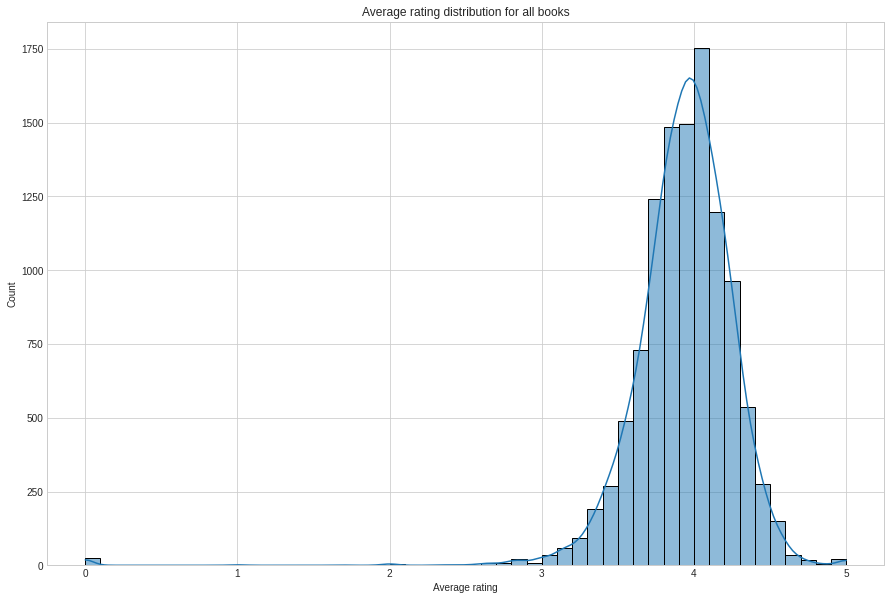

In [33]:
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15, 10])

sns.histplot(df['average_rating'], ax=ax, kde=True, bins=50)
ax.set_title('Average rating distribution for all books')
ax.set_xlabel('Average rating')

plt.show()

Text(0.5, 1.0, 'Relation between Rating counts and avg rating')

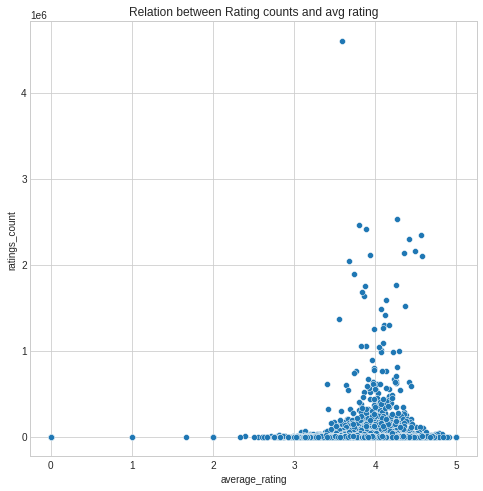

In [42]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(data=df, x='average_rating', y='ratings_count', sizes=(400, 200))
plt.title('Relation between Rating counts and avg rating')

## Data Preparation

In [43]:
df2 = df.copy()

In [45]:
df2.loc[(df2['average_rating']>=0)&(df2['average_rating']<=1), 'rating between']='between 0 and 1'
df2.loc[(df2['average_rating']>1)&(df2['average_rating']<=2), 'rating between']='between 1 and 2'
df2.loc[(df2['average_rating']>2)&(df2['average_rating']<=3), 'rating between']='between 2 and 3'
df2.loc[(df2['average_rating']>3)&(df2['average_rating']<=4), 'rating between']='between 3 and 4'
df2.loc[(df2['average_rating']>4)&(df2['average_rating']<=5), 'rating between']='between 4 and 5'

In [48]:
df2.sort_values('average_rating')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating between
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,1932206086,9781932206081,eng,304,0,0,1/1/2003,Frederick P. Lenz Foundation for American Budd...,between 0 and 1
9437,37467,Classroom Interactions as Cross-Cultural Encou...,Jasmine C.M. Luk/Angel M.Y. Lin,0.0,0805850848,9780805850840,eng,241,0,0,8/5/2006,Routledge,between 0 and 1
2532,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,1932206108,9781932206104,eng,228,0,0,1/1/2004,Frederick P. Lenz Foundation for American Budd...,between 0 and 1
375,1302,Juiced Official Strategy Guide,Doug Walsh,0.0,0744005612,9780744005615,eng,112,0,0,6/1/2005,BradyGames,between 0 and 1
265,799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0,1740592050,9781740592055,eng,295,0,0,9/1/2001,Lonely Planet,between 0 and 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5648,20957,Colossians and Philemon: A Critical and Exeget...,R. McL. Wilson,5.0,0567044718,9780567044716,eng,512,1,0,12/7/2005,T&T Clark Int'l,between 4 and 5
6184,23276,Taxation of Mineral Rents,Ross Garnaut,5.0,0198284543,9780198284543,eng,350,1,0,11/17/1983,Oxford University Press USA,between 4 and 5
5023,18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,0851621813,9780851621814,eng,96,1,0,6/1/2004,Boosey & Hawkes Inc,between 4 and 5
4933,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1/1/1975,Vantage Press,between 4 and 5


In [49]:
rating_df = pd.get_dummies(df2['rating between'])
language_df = pd.get_dummies(df2['language_code'])

language_df

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11119,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11120,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
feature = pd.concat([rating_df, language_df, df2['average_rating'], df2['ratings_count']], axis=1)
feature

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.06,156
11119,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.08,783
11120,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.96,820
11121,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.72,769


## Building the Model for Book recommendations

In [52]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
feature = minmax.fit_transform(feature)

In [53]:
feature

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

In [54]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

model = neighbors.NearestNeighbors(n_neighbors=8, algorithm='ball_tree')

model.fit(feature)

dist, idlist = model.kneighbors(feature)

In [55]:
dist

array([[0.00000000e+00, 2.03047674e-02, 4.26182285e-02, ...,
        9.59972118e-02, 1.12071674e-01, 1.32200365e-01],
       [0.00000000e+00, 2.03047674e-02, 2.65284290e-02, ...,
        9.31968321e-02, 9.67920519e-02, 1.40569027e-01],
       [0.00000000e+00, 3.58877744e-04, 4.43050887e-04, ...,
        7.45378198e-04, 7.98231102e-04, 8.15631236e-04],
       ...,
       [0.00000000e+00, 3.26252494e-06, 4.35003326e-06, ...,
        1.37026048e-05, 1.41376081e-05, 1.54426181e-05],
       [0.00000000e+00, 1.30500998e-06, 3.48002660e-06, ...,
        1.54426181e-05, 1.97926513e-05, 2.39251829e-05],
       [0.00000000e+00, 1.28325981e-05, 2.41426846e-05, ...,
        2.00000626e-03, 2.00002840e-03, 2.00004401e-03]])

In [56]:
idlist

array([[    0,     1,    23, ...,  7309,  1697,  5270],
       [    1,     0,    23, ...,  1697,  7309,  5270],
       [    2,  2562,  3101, ..., 10838,  6023,  8497],
       ...,
       [11120,  5459,  8599, ...,  3664, 10935,  1418],
       [11121,  1463,  8854, ...,  5740,  7686,  2908],
       [11122,  6343, 10297, ...,  8250, 11107,  7351]])

In [67]:
def bookRecom(name):
    book_list = []
    book_id = df2[df2['title']==name].index
    book_id = book_id[0]
    for new in idlist[book_id]:
        book_list.append(df2.loc[new].title)
    return book_list
    
Book_name = bookRecom('The Lightning Thief (Percy Jackson and the Olympians  #1)')
data = pd.DataFrame(Book_name, columns=['Recommended Books'])

In [68]:
data

,Recommended Books
0,The Lightning Thief (Percy Jackson and the Oly...
1,The Giver (The Giver #1)
2,The Book Thief
3,Little Women
4,The Fellowship of the Ring (The Lord of the Ri...
5,Jane Eyre
6,Harry Potter and the Half-Blood Prince (Harry ...
7,Harry Potter and the Order of the Phoenix (Har...
